# Concrete Filled Steel Tube Section

                               Section Properties                                
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                    ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 2.204E+00                │ Cross-sectional area                   │
│ Asy       │ 1.813E+00                │ Shear area y-axis                      │
│ Asz       │ 1.813E+00                │ Shear area z-axis                      │
│ centroid  │ (-5.052E-17, -1.497E-17) │ Elastic centroid                       │
│ Iy        │ 3.676E-01                │ Moment of inertia y-axis               │
│ Iz        │ 3.676E-01                │ Moment of inertia z-axis               │
│ Iyz       │ 2.228E-18                │ Product of inertia                     │
│ Wyt       │ 4.902E-01                │ Section moduli of top fibres y-axis    │
│ Wyb       │ 4.902E-01                │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 4.902E-01                │ Section moduli of top fibres z-axis    │
│ Wzb       │ 4.902E-01                │ Section moduli of bottom fibres z-axis │
│ J         │ 6.010E-01                │ Torsion constant                       │
│ phi       │ 0.000E+00                │ Principal axis angle                   │
│ mass      │ 1.760E+00                │ Section mass                           │
│ rho_rebar │ 0.000E+00                │ Ratio of reinforcement                 │
└───────────┴──────────────────────────┴────────────────────────────────────────┘

                            Frame Section Properties                             
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                    ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 2.204E+00                │ Cross-sectional area                   │
│ centroid  │ (-5.052E-17, -1.497E-17) │ Elastic centroid                       │
│ Iy        │ 3.676E-01                │ Moment of inertia y-axis               │
│ Iz        │ 3.676E-01                │ Moment of inertia z-axis               │
│ Iyz       │ 2.228E-18                │ Product of inertia                     │
│ Wyt       │ 4.902E-01                │ Section moduli of top fibres y-axis    │
│ Wyb       │ 4.902E-01                │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 4.902E-01                │ Section moduli of top fibres z-axis    │
│ Wzb       │ 4.902E-01                │ Section moduli of bottom fibres z-axis │
│ J         │ 6.010E-01                │ Torsion constant                       │
│ phi       │ 0.000E+00                │ Principal axis angle                   │
│ mass      │ 1.760E+00                │ Section mass                           │
│ rho_rebar │ 0.000E+00                │ Ratio of reinforcement                 │
└───────────┴──────────────────────────┴────────────────────────────────────────┘

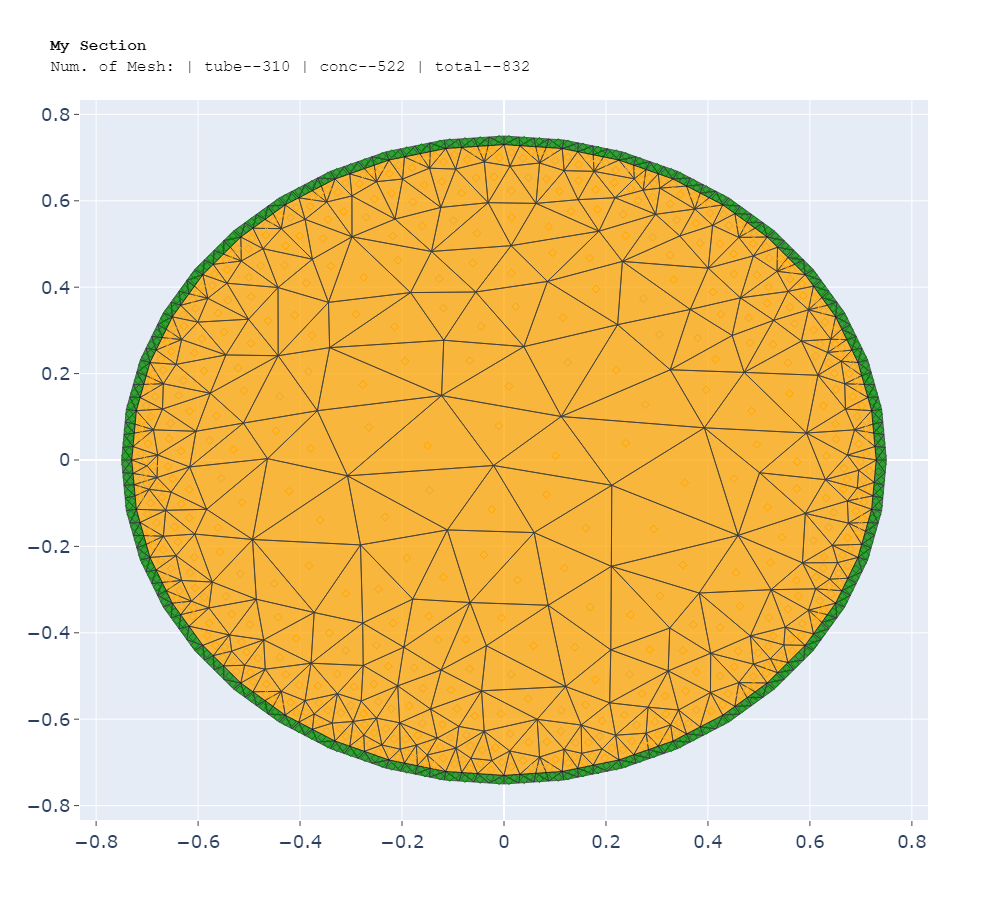

In [4]:
import opstool

Ec = 3.45E7
Es = 2.0E8
Nus = 0.3
Nuc = 0.2
tube_d = 0.02
steel_mat = opstool.add_material(name='steel', elastic_modulus=Es, poissons_ratio=Nus)
conc_mat = opstool.add_material(
    name='conc', elastic_modulus=Ec, poissons_ratio=Nuc)
all_ = opstool.add_circle(xo=[0, 0], radius=0.75)
conc = opstool.add_circle(xo=[0, 0], radius=0.75 - tube_d)
tube = all_ - conc
conc.material = conc_mat
tube.material = steel_mat
sec = opstool.SecMesh()
sec.assign_group(dict(tube=tube, conc=conc))
sec.assign_mesh_size(dict(tube=0.1, conc=0.2))
sec.assign_group_color(dict(tube="green", conc="orange"))
sec.assign_ops_matTag(dict(tube=1, conc=2))
sec.mesh()
sec_props = sec.get_sec_props(
    Eref=Ec, display_results=True, plot_centroids=False)
sec_props2 = sec.get_frame_props(
    Eref=Ec, display_results=True)
# sec.rotate(45)
sec.view(fill=True, engine='p', save_html=None, on_notebook=True)